### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Loading the data

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Check for missing values

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [5]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [6]:
df['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

### Splitting the genres

In [7]:
df['genres'] = df['listed_in'].str.split(', ')

In [8]:
df['genres']

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: genres, Length: 8807, dtype: object

In [9]:
df_exploded = df.explode('genres')

In [10]:
df_exploded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,International Movies


### Country wise mode

In [11]:
genre_country_mode = df_exploded.groupby('genres')['country'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
)

In [12]:
genre_country_mode

genres
Action & Adventure               United States
Anime Features                           Japan
Anime Series                             Japan
British TV Shows                United Kingdom
Children & Family Movies         United States
Classic & Cult TV                United States
Classic Movies                   United States
Comedies                         United States
Crime TV Shows                   United States
Cult Movies                      United States
Documentaries                    United States
Docuseries                       United States
Dramas                                   India
Faith & Spirituality             United States
Horror Movies                    United States
Independent Movies               United States
International Movies                     India
International TV Shows             South Korea
Kids' TV                         United States
Korean TV Shows                    South Korea
LGBTQ Movies                     United States
Movies

### Filling in the missing values for country column

In [13]:
# Map the mode back to the original DataFrame for missing 'country' values
df['country'] = df.apply(
    lambda row: genre_country_mode[row['genres'][0]] if pd.isnull(row['country']) and row['genres'] else row['country'],
    axis=1
)

In [14]:
missing_values = df.isnull().sum()
print(missing_values)


show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
genres             0
dtype: int64


### Exploring the rating column

In [15]:
df.rating.value_counts()
df.rating.replace(['74 min', '84 min', '66 min'], 'TV-MA',inplace=True)

In [16]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
# Get the row with index label '3'
specific_row = df.loc[211]
print(specific_row)


show_id                                                      s212
type                                                        Movie
title                                                Ragini MMS 2
director                                            Bhushan Patel
cast            Sunny Leone, Saahil Prem, Parvin Dabas, Sandhy...
country                                                     India
date_added                                        August 27, 2021
release_year                                                 2014
rating                                                      TV-MA
duration                                                  113 min
listed_in                     Horror Movies, International Movies
description     The horror continues when Ragini's video goes ...
genres                      [Horror Movies, International Movies]
Name: 211, dtype: object


In [18]:
df['genres']

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: genres, Length: 8807, dtype: object

In [19]:
rating_replacements = {
    211: 'TV-14',
    2411: 'TV-14',
    3288: 'PG-13',
    4056: 'TV-G',
    4402: 'TV-G',
    4403: 'TV-G',
    4706: 'TV-14',
    5015: 'TV-14',
    5234: 'TV-14',
    6231: 'TV-Y'
}

for id, rate in rating_replacements.items():
    df.iloc[id, 8] = rate
    
df['rating'].isna().sum()

4

In [20]:
df.loc[[5989], ['rating']] = 'TV-PG'
df.loc[[6827], ['rating']] = 'TV-14'
df.loc[[7312], ['rating']] = 'TV-PG'
df.loc[[7537], ['rating']] = 'PG-13'

In [21]:
df['rating'].isna().sum()

0

In [22]:
df.loc[df.rating.isin(['TV-Y7-FV']), ['rating']] = 'TV-Y7'
df.loc[df.rating.isin(['TV-G']), ['rating']] = 'G'
df.loc[df.rating.isin(['TV-PG']), ['rating']] = 'PG'
df.loc[df.rating.isin(['TV-MA']), ['rating']] = 'R'
df.loc[df.rating.isin(['NR', 'UR']), ['rating']] = 'nrur'

In [23]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,R,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,R,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,R,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,R,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","[Cult Movies, Dramas, Thrillers]"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[Children & Family Movies, Comedies]"


### Number of ratings per rating category

Text(0.5, 1.0, 'Number of ratings')

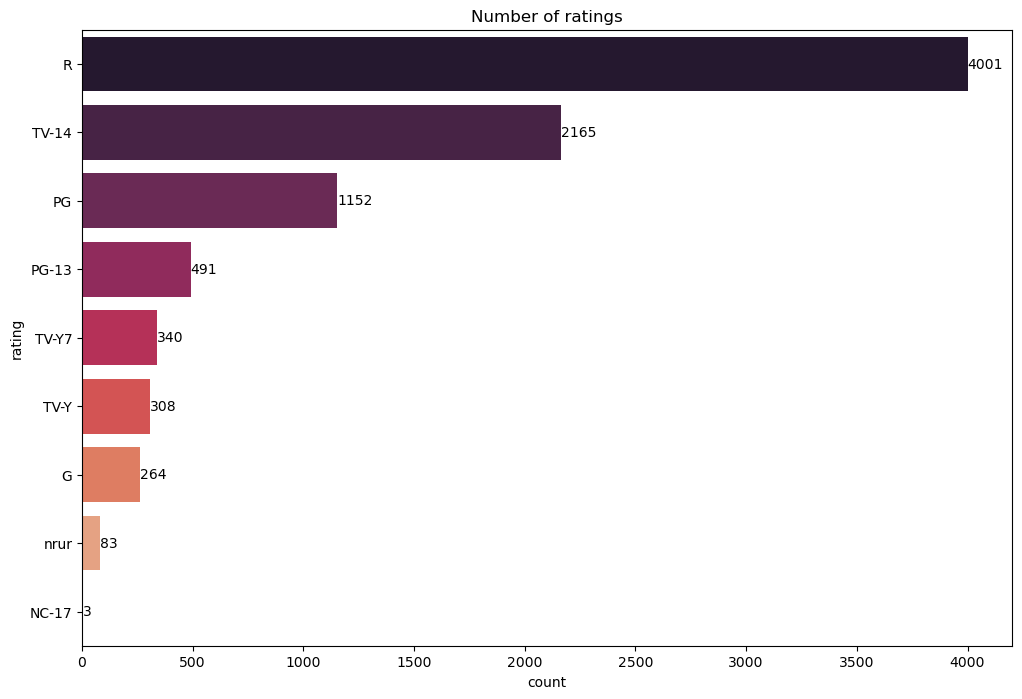

In [24]:
fig, ax = plt.subplots(figsize =(12,8))
ax = sns.countplot(y=df.rating,order = df.rating.value_counts().index,palette='rocket')
ax.bar_label(ax.containers[0])
ax.set_title('Number of ratings')

### Amount of Content per Country

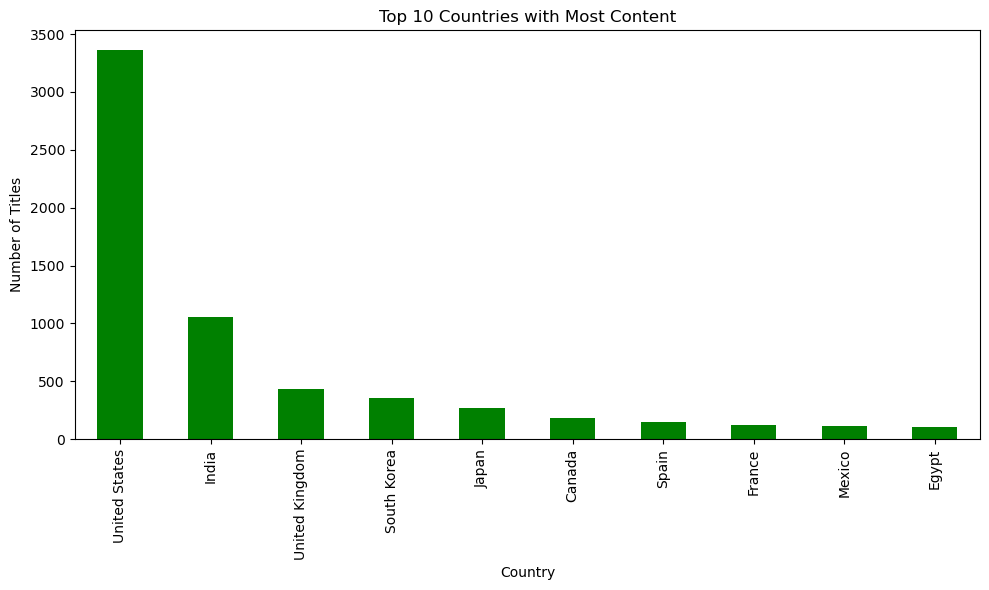

In [25]:
country_counts = df['country'].value_counts()[:10]
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='green')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


### Date time column

In [26]:
# Data Cleaning
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # Convert to datetime
df['year_added'] = df['date_added'].dt.year  # Extract year
df['month_added'] = df['date_added'].dt.month  # Extract month
# df['duration'] = df['duration'].fillna('Unknown')  # Handle missing durations

In [27]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,R,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,R,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac...",2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,R,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,R,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV...",2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","[Cult Movies, Dramas, Thrillers]",2019.0,11.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","[Kids' TV, Korean TV Shows, TV Comedies]",2019.0,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"[Comedies, Horror Movies]",2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[Children & Family Movies, Comedies]",2020.0,1.0


In [28]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        98
release_year       0
rating             0
duration           3
listed_in          0
description        0
genres             0
year_added        98
month_added       98
dtype: int64

In [29]:
# Convert 'year_added' to integers, handling missing values
df['year_added'] = df['year_added'].fillna(0).astype(int)
df['month_added'] = df['month_added'].fillna(0).astype(int)

# Replace 0 with NaN for clarity (optional)
df['year_added'] = df['year_added'].replace(0, pd.NA)
df['month_added'] = df['month_added'].replace(0, pd.NA)


In [30]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,R,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,R,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac...",2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,R,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,R,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV...",2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","[Cult Movies, Dramas, Thrillers]",2019,11
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","[Kids' TV, Korean TV Shows, TV Comedies]",2019,7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"[Comedies, Horror Movies]",2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[Children & Family Movies, Comedies]",2020,1


In [31]:
df['duration'].isna().sum()

3

### Number of Movies and TV Shows on Netflix

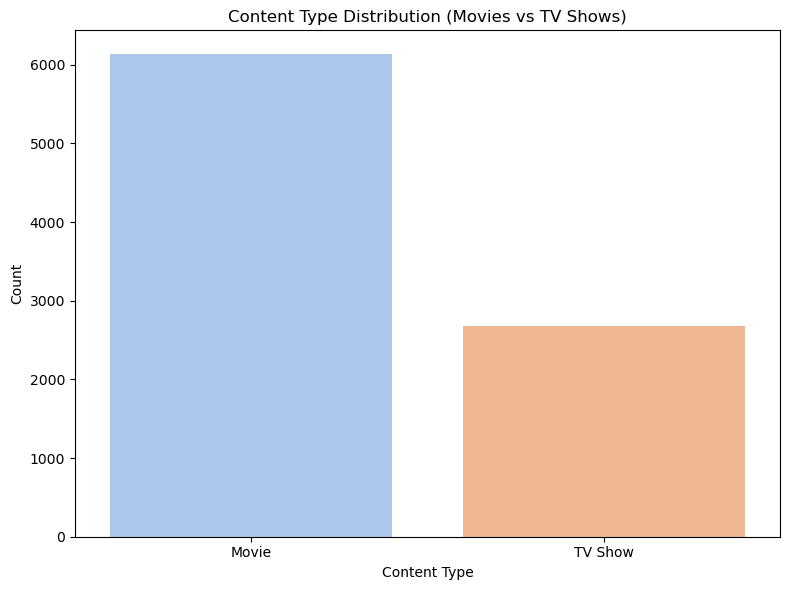

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Content Type Distribution (Movies vs TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
df['genres']

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: genres, Length: 8807, dtype: object

### Plot 1: Popular Genres by Region

<Figure size 1600x800 with 0 Axes>

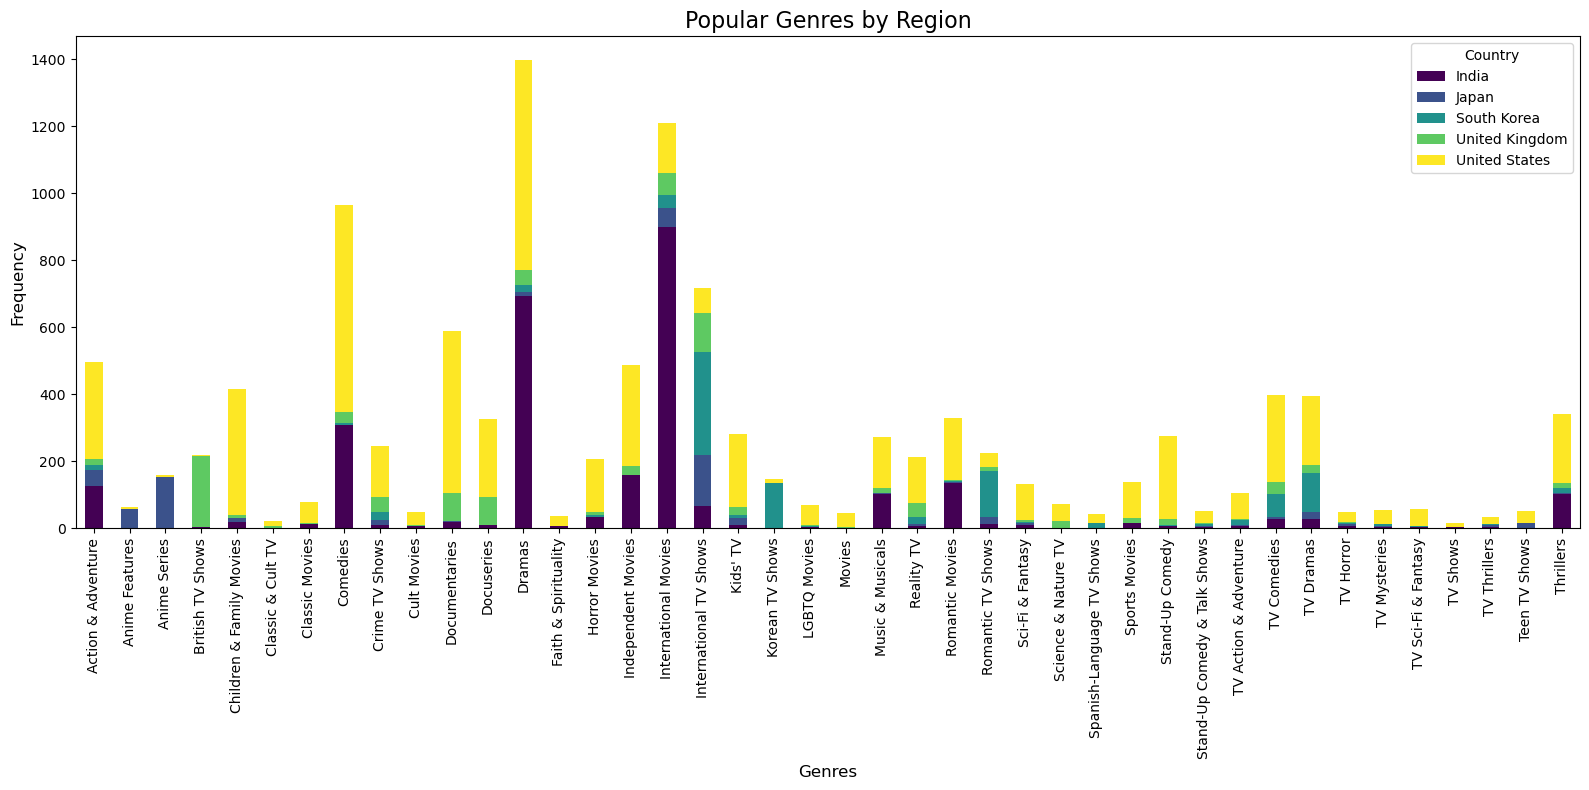

In [34]:
df_exploded = df.explode('genres')

# Filter countries for visualization
top_countries = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']
df_filtered = df_exploded[df_exploded['country'].isin(top_countries)]

# Count genres by country
genre_country_counts = df_filtered.groupby(['genres', 'country']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(16, 8))
genre_country_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(16, 8))
plt.title('Popular Genres by Region', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Country', fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### # Plot 2: Temporal Trends in Content Production


<Figure size 1200x600 with 0 Axes>

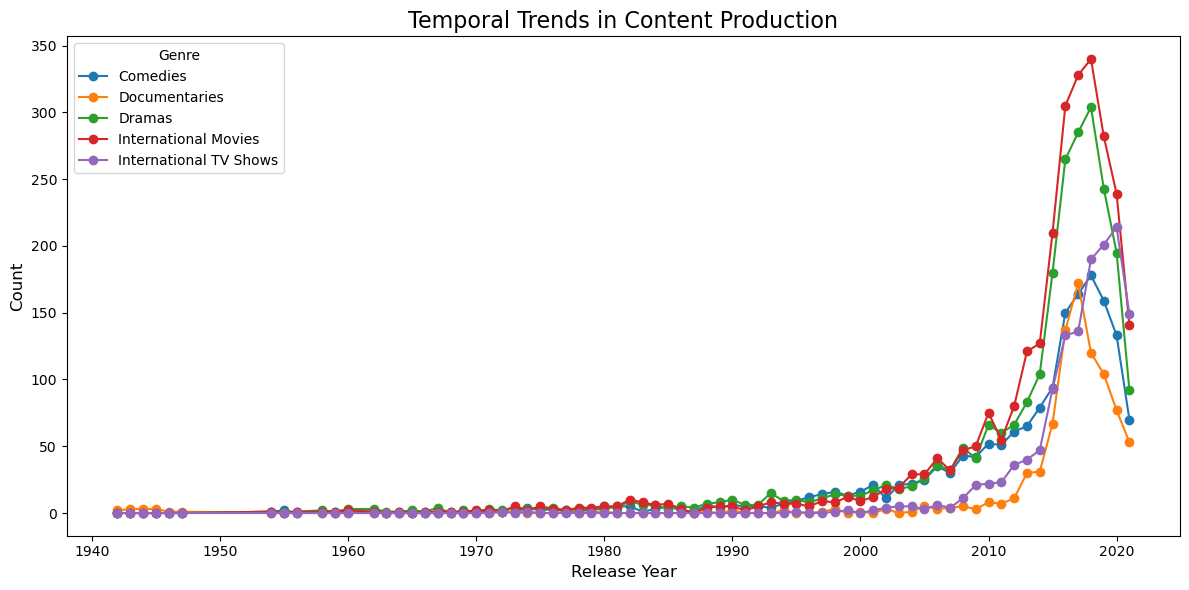

In [35]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
top_genres = ['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries']
df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]

# Count by year and genre
temporal_trends = df_filtered.groupby(['release_year', 'genres']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 6))
temporal_trends.plot(marker='o', figsize=(12, 6))
plt.title('Temporal Trends in Content Production', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Genre', fontsize=10)
plt.tight_layout()
plt.show()

### TF-IDF Vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from fuzzywuzzy import process

c:\Users\Admin\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [37]:
def preprocess_data(df):
    #Setting Maturity Levels for kids, Teens, Adults
    kid = df[df.rating.isin(['TV-Y','TV-Y7','G','PG'])].index
    teen = df[df.rating.isin(['PG-13','TV-14'])].index
    adult = df[df.rating.isin(['R','NC-17','nrur'])].index
    df.loc[kid, 'maturity_level'] = 'kid'
    df.loc[teen, 'maturity_level'] = 'teen'
    df.loc[adult, 'maturity_level'] = 'adult'
                      
    # combining all the contents making a big string of knowledge
    df['content'] = df['title'].astype(str) + ' ' + df['director'].astype(str) + ' ' + df['cast'].astype(str) + ' ' + df['country'].astype(str) + ' ' + df['rating'].astype(str) + df['duration'].astype(str) + ' ' + df['listed_in'].astype(str) + ' ' + df['description'].astype(str)  + ' ' + df['maturity_level'].astype(str)
    df['content'] = df['content'].fillna('')



def create_tfidf_matrix(df):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['content'])
    return tfidf_matrix

# Function to create Bag of Words (BoW) matrix
def create_bow_matrix(df):
    count_vectorizer = CountVectorizer()
    bow_matrix = count_vectorizer.fit_transform(df['content'])
    return bow_matrix

# Function to compute TF-IDF cosine similarity
def tfidf_cosine_similarity(tfidf_matrix):
    cosine_sim = cosine_similarity(tfidf_matrix)
    return cosine_sim

# Function to compute BoW cosine similarity
def bow_cosine_similarity(bow_matrix):
    cosine_sim = cosine_similarity(bow_matrix)
    return cosine_sim

# Function to train Word2Vec model
def train_word2vec(df):
    df['tokenized_content'] = df['content'].apply(simple_preprocess)
    model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)
    model.build_vocab(df['tokenized_content'])
    model.train(df['tokenized_content'], total_examples=model.corpus_count, epochs=10)
    return model

# Function to average word vectors for a text
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) for tokenized_sentence in corpus]
    return np.array(features)

# Function to compute Word2Vec-based similarity
def word2vec_similarity(user_movie, df):
    user_movie = find_similar_movies_fuzzy(df, user_movie)
    df['tokenized_content'] = df['content'].apply(simple_preprocess)
    model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)
    model.build_vocab(df['tokenized_content'])
    model.train(df['tokenized_content'], total_examples=model.corpus_count, epochs=10)
    movie_index = df[df['title'] == user_movie].index[0]
    w2v_feature_array = averaged_word_vectorizer(corpus=df['tokenized_content'], model=model, num_features=100)

    # Compute the cosine similarities between the user movie and all other movies
    user_movie_vector = w2v_feature_array[movie_index].reshape(1, -1)
    similarity_scores = cosine_similarity(user_movie_vector, w2v_feature_array)

    # Get the top 10 most similar movies
    similar_movies = list(enumerate(similarity_scores[0]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:20]

    # Print the top 10 similar movies
    for i, score in sorted_similar_movies:
        print("{}: {}".format(i, df.loc[i, 'title']))

    


# Function to compute BoW-based similarity
def bow_similarity(user_movie, df, bow_matrix):
    user_movie = find_similar_movies_fuzzy(df, user_movie)
    movie_index = df[df['title'] == user_movie].index[0]
    similarity_scores = bow_cosine_similarity(bow_matrix)
    similar_movies = list(enumerate(similarity_scores[movie_index]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:20]
    for i, score in sorted_similar_movies:
        print("{}: {}".format(i, df.loc[i, 'title']))

# Function to compute TF-IDF-based similarity
def tfidf_similarity(user_movie, df, tfidf_matrix):
    user_movie = find_similar_movies_fuzzy(df, user_movie)
    movie_index = df[df['title'] == user_movie].index[0]
    similarity_scores = tfidf_cosine_similarity(tfidf_matrix)
    similar_movies = list(enumerate(similarity_scores[movie_index]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:20]
    for i, score in sorted_similar_movies:
        print("{}: {}".format(i, df.loc[i, 'title']))

# Function to find similar movies using fuzzy string matching
def find_similar_movies_fuzzy(df, movie_name):
    top_movies = process.extract(movie_name, df['title'], limit=5)
    return top_movies[0][0]

def similar_movies_fuzzy(df, movie_name):
    top_movies = process.extract(movie_name, df['title'], limit=5)
    print("Advanced Search and similar Alternatives")
    for movie, score, index in top_movies:
        print(f"Movie: {movie}, Similarity Score: {score}")
    

In [38]:
copied_df = df.copy()

In [39]:
# Preprocess data and create the 'content' column
preprocess_data(copied_df)

# Create the TF-IDF matrix and BoW matrix
tfidf_matrix = create_tfidf_matrix(copied_df)
bow_matrix = create_bow_matrix(copied_df)





In [40]:
# Get user input
user_movie = input("Enter a movie title: ")

similar_movies_fuzzy(copied_df, user_movie)

print("\nSimilar Movies (TF-IDF Cosine Similarity):")
tfidf_similarity(user_movie, copied_df, tfidf_matrix)

print("\nSimilar Movies (BoW Cosine Similarity):")
bow_similarity(user_movie, copied_df, bow_matrix)

print("\nSimilar Movies (Word2Vec Similarity):")
similarity_scores = word2vec_similarity(user_movie, copied_df)

Advanced Search and similar Alternatives
Movie: Superbad, Similarity Score: 100
Movie: Adú, Similarity Score: 90
Movie: P, Similarity Score: 90
Movie: Superstar, Similarity Score: 71
Movie: Esperando la carroza, Similarity Score: 68

Similar Movies (TF-IDF Cosine Similarity):
4938: Seth Rogen's Hilarity for Charity
178: The Interview
3305: Seth Meyers: Lobby Baby
5900: Wet Hot American Summer
2010: How to Train Your Dragon 2
346: Pineapple Express
5540: Win It All
5035: Dragons: Race to the Edge
6710: Evan Almighty
145: House Party 2
1833: ParaNorman
7515: Movie 43
4289: Dragons: Dawn of the Dragon Racers
2454: The Disaster Artist
4718: Like Father
5133: Trolls Holiday Special
6414: Can't Hardly Wait
4629: Maniac
1443: QB1: Beyond the Lights

Similar Movies (BoW Cosine Similarity):
145: House Party 2
7498: Monster High: Haunted
7121: Jay and Silent Bob Strike Back
5833: Brahman Naman
8401: The Longest Yard
1830: What Did I Mess
3314: 100 Things to do Before High School
648: Too Hot to 

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

In [43]:
df.to_csv('final_dataset.csv', index=False)

In [44]:


# Preprocess textual data for TF-IDF
df['content'] = df['title'] + " " + df['description'].fillna("")
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)



In [45]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01182809,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.0194635 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01182809, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.0194635 , ..., 0.        , 0.        ,
        1.        ]])

In [46]:
# Build the graph
threshold = 0.3  # Set a similarity threshold for edge creation
G = nx.Graph()

# Add nodes
for i, title in enumerate(df['title']):
    G.add_node(i, title=title)

# Add edges based on similarity threshold
for i in range(cosine_sim.shape[0]):
    for j in range(i + 1, cosine_sim.shape[1]):
        if cosine_sim[i, j] > threshold:
            G.add_edge(i, j, weight=cosine_sim[i, j])



In [ ]:
# Apply community detection algorithm (Louvain)
communities = greedy_modularity_communities(G)

# Visualize the graph with communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout
colors = [plt.cm.tab20(i / len(communities)) for i in range(len(communities))]

for idx, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=[colors[idx]], label=f'Community {idx+1}')

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Graph-Based Clustering of Movies', fontsize=16)
plt.legend()
plt.show()


KeyboardInterrupt: 